In [2]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data1=pd.read_csv("/Users/wangyu/Documents/LMU/rna/file1.ASSEMBL.Q30.L200.FUNCT.VDJCDR3len.CLONES1.tab.csv",delimiter="\t")
data1.head()

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,MUTATED_INVARIANT,INDELS,V_CALL,D_CALL,J_CALL,...,V_IDENTITY,V_EVALUE,V_BTOP,J_SCORE,J_IDENTITY,J_EVALUE,J_BTOP,CONSCOUNT,VDJCDR3LEN,CLONE
0,ATAACAGGCCTGTGC,GTCATTTAAGCAGTGGTATCAACGCAGAGTACGGGGACAGACCCAT...,T,T,F,NaN,F,IGKV8-18*01,NaN,IGKJ5*01,...,0.99677,5.990000e-138,108CA201,69.9,1.0,3.130000e-16,36,1,IGKV8-18*01++IGKJ5*01+33,1
1,AATAACTCAATTCCT,GGCCACGAAGCAGTGGTATCAACGCAGAGTACGGGGACAGACCCAT...,T,T,F,NaN,F,IGKV8-18*01,NaN,IGKJ5*01,...,1.00000,6.900000e-139,310,69.9,1.0,3.130000e-16,36,1,IGKV8-18*01++IGKJ5*01+33,1
2,GATTAAGAAGCACAT,GGACCCCAAGCAGTGGTATCAACGCAGAGTACGGGGAATTAGCCAG...,T,T,F,NaN,F,IGKV4-91*01,NaN,IGKJ4*01,...,0.95357,1.330000e-112,2GA27GA97TC9GC11GA6TC9AT12AG4TC50AG16AC12TC10CG2,73.7,1.0,2.280000e-17,38,1,IGKV4-91*01++IGKJ4*01+24,2
3,TGTGTCTTTGTTTTG,CCCCCTCAAGCAGTGGTATCAACGCAGAGTACGGGGGAGATGGAAA...,T,T,F,NaN,T,IGKV4-91*01,NaN,IGKJ4*01,...,0.93571,4.720000e-106,2GA27GA41AG41-C-A-G11TC9GC4AG6GA6TC9AT12AG4TC5...,73.7,1.0,2.190000e-17,38,1,IGKV4-91*01++IGKJ4*01+24,2
4,CTTGGGCTGAGTATA,ATAACTAAAGCAGTGGTATCAACGCAGAGTACGGGGACTGAGATGG...,T,T,F,NaN,F,IGKV4-91*01,NaN,IGKJ4*01,...,0.99298,2.810000e-125,64AC40GT179,71.8,1.0,8.420000e-17,37,1,IGKV4-91*01++IGKJ4*01+24,3


In [4]:
print(data1.shape)

(215948, 48)


In [5]:
data2=pd.read_csv("/Users/wangyu/Documents/LMU/rna/file2.ASSEMBL.Q30.L200.FUNCT.CLONES2.tab.csv",delimiter="\t")
data2.head()

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,MUTATED_INVARIANT,INDELS,V_CALL,D_CALL,J_CALL,...,V_IDENTITY,V_EVALUE,V_BTOP,J_SCORE,J_IDENTITY,J_EVALUE,J_BTOP,CONSCOUNT,VDJCDR3LEN,CLONE
0,ATTTCAAAGAGTGAN,AAGAGGAAAGCAGTGGTATCAACGCAGAGTACGGGGATGCTTTCTG...,T,T,F,NaN,F,IGHV4-39*01,IGHD3-9*01,IGHJ6*03,...,0.95286,1.390000e-119,11AG81CACG2AG21TC1CA20GA12CT6AT9AG22GA28CG7TA1...,87.2,0.94444,3.120000e-21,4TA6TC17GA24,1,IGHV4-39*01+IGHD3-9*01+IGHJ6*03+72,1
1,ACCTAGCCAATTACN,CAACAAGAAGCAGTGGTATCAACGCAGAGTACGGGAAAATCCTTTC...,T,T,F,NaN,F,IGHV4-39*01,IGHD3-9*01,IGHJ6*03,...,0.94613,1.050000e-117,3GC4AG58AC25CACG2AG21TC19CT15CT6AT9AG22GA11CA1...,87.2,0.94444,3.130000e-21,4TA6TC17GA24,1,IGHV4-39*01+IGHD3-9*01+IGHJ6*03+72,1
2,GATGATTGTCGCGTG,CTTGCGCAAGCAGTGGTATCAACGCAGAGTACGGGGGCTTTCTGAG...,T,T,F,NaN,F,IGHV4-39*01,IGHD3-9*01,IGHJ6*03,...,0.93289,2.000000e-114,79CG9TCGA6CG2TATC29CG7CT12CGTA2GA3CA5CG28CA22T...,112.0,1.00000,9.290000e-29,58,1,IGHV4-39*01+IGHD3-9*01+IGHJ6*03+72,2
3,GAGATTAAGTCACAT,GGAGGCCAAGCAGTGGTATCAACGCAGAGTACGGGATGCTTTCTGA...,T,T,F,NaN,F,IGHV4-39*01,"IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",IGHJ6*03,...,0.89562,1.230000e-103,3TC58AC16CG1CT6CG3GT6CT1AC1CA24CA10GT4GT9CGCT3...,106.0,0.98276,5.070000e-27,12TC45,1,IGHV4-39*01+IGHD2-2*01+IGHJ6*03+72,3
4,CGATTGGGCGTTGGN,ACGCCCTAAGNAGTGGTATCAACGCAGAGTACGGGGATGCTTTCTG...,T,T,F,NaN,T,IGHV4-39*01,"IGHD2-2*01,IGHD2-2*02,IGHD2-2*03",IGHJ6*03,...,0.89899,1.060000e-102,9GC13AC37AC17CG9-C-A-G1GA2GA1GT3CT11TAGT2CG3AG...,106.0,0.98276,5.050000e-27,12TC45,1,IGHV4-39*01+IGHD2-2*01+IGHJ6*03+72,3


In [6]:
print(data2.shape)

(4000764, 48)


In [7]:
data_matrix=data1.as_matrix()

In [8]:
data1.tail()

,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,MUTATED_INVARIANT,INDELS,V_CALL,D_CALL,J_CALL,...,V_IDENTITY,V_EVALUE,V_BTOP,J_SCORE,J_IDENTITY,J_EVALUE,J_BTOP,CONSCOUNT,VDJCDR3LEN,CLONE
215943,TTGACTGTCCATGAA,TCGCTCCAAGCAGTGGTATCAACGCAGAGTACGGGATTGTCATTGC...,T,T,F,NaN,F,IGKV9-124*01,NaN,IGKJ1*01,...,1.00000,3.790000e-127,285,71.8,1.00000,8.530000e-17,37,1,IGKV9-124*01++IGKJ1*01+27,651
215944,TCCCTGCTGTGTCGC,CCGAAACAAGCAGTGGTATCAACGCAGAGTACGGGGATTGCAGTCA...,T,T,F,NaN,F,IGKV9-124*01,NaN,"IGKJ4*01,IGKJ4*02",...,0.99296,8.300000e-125,101AC167GA14,68.0,0.97368,1.210000e-15,24AG13,1,IGKV9-124*01++IGKJ4*01+27,651
215945,TGTTCCTAACGAGCC,AGCGTATAAGCAGTGGTATCAACGCAGAGTACGGGGATTGCAGTCA...,T,T,F,NaN,F,IGKV9-124*01,NaN,"IGKJ4*01,IGKJ4*02",...,0.99296,8.300000e-125,101AC167GA14,68.0,0.97368,1.210000e-15,24AG13,1,IGKV9-124*01++IGKJ4*01+27,651
215946,AACCGCGGCGCATTG,AAGATGAAAGCAGTGGTATCAACGCAGAGTACGGGGATTGTCATTG...,T,T,F,NaN,F,IGKV9-124*01,NaN,IGKJ4*01,...,0.99296,8.420000e-125,101AC167GA14,73.7,1.00000,2.260000e-17,38,1,IGKV9-124*01++IGKJ4*01+27,651
215947,GAGGCAACAGGAGTC,GTGAGTGAAGCAGTGGTATCAACGCAGAGTACGGGGATTGTCATTG...,T,T,F,NaN,F,IGKV9-124*01,NaN,IGKJ4*01,...,0.92606,5.610000e-107,195GA1AG6AT6TACTAT15AGTCGC1GTCG10CT2GT5GC4TA5A...,73.7,1.00000,2.260000e-17,38,1,IGKV9-124*01++IGKJ4*01+27,652


extract small data from dataset

In [9]:
print(data_matrix.shape)
rna_sequence=data_matrix[:,1]
# print(rna_sequence.shape)
# import random
# random.shuffle(rna_sequence)
# rna_sequence=rna_sequence[1:50,]
print(rna_sequence.shape)
# print(rna_sequence)

(215948, 48)
(215948,)


# doing one hot encoding with this small data set

In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [11]:
# for i in range(len(rna_sequence)):
#     char_list=list(rna_sequence[i])
#     values= np.array(char_list)#shape:seq_num*1
#     #integer encode
#     label_encoder=LabelEncoder()
#     integer_encoded=label_encoder.fit_transform(values)#shape:1*seq_num
#     #one hot encode
#     one_hot_encoder=OneHotEncoder(sparse=False)
#     integer_encoded=integer_encoded.reshape(len(integer_encoded),1)#shape:seq_num*1
#     one_hot_encoded=one_hot_encoder.fit_transform(integer_encoded)#shape:seq_num*4
#     row,col=one_hot_encoded.shape
#     one_hot_encoded=one_hot_encoded.reshape(1,row*col)
#     print(row,col)

In [12]:
# char_list=list(rna_sequence[3])
# #print(char_list)
# values= np.array(char_list)#shape:seq_num*1
# #integer encode
# label_encoder=LabelEncoder()
# integer_encoded=label_encoder.fit_transform(values)#shape:1*seq_num
# #one hot encode
# one_hot_encoder=OneHotEncoder(sparse=False)
# integer_encoded=integer_encoded.reshape(len(integer_encoded),1)#shape:seq_num*1
# one_hot_encoded=one_hot_encoder.fit_transform(integer_encoded)#shape:seq_num*4
# row,col=one_hot_encoded.shape
# one_hot_encoded=one_hot_encoded.reshape(1,row*col)

In [11]:
maxLen=max(map(len,rna_sequence))+1
print(maxLen)
def one_hot_encode(seq):    
    char_list=list(seq)
    values=np.array(char_list) #shape:seq_num*1
    #concatenate with 'N'
    rows,=values.shape
    if(rows<maxLen):
        con=np.full((maxLen-rows,),'N')
        values=np.concatenate((values,con)) #shape:maxLen*1
    #integer encode
    label_encoder=LabelEncoder()
    integer_encoded=label_encoder.fit_transform(values)#shape:1*maxLen
    #one hot encode
    one_hot_encoder=OneHotEncoder(categories='auto',sparse=False)
    integer_encoded=integer_encoded.reshape(len(integer_encoded),1)#shape:seq_num*1
    one_hot_encoded=one_hot_encoder.fit_transform(integer_encoded) #shape:seq_num*5
    row,col=one_hot_encoded.shape
    one_hot_encoded=one_hot_encoded.reshape(row*col,)
    return one_hot_encoded
a=np.array(list(map(one_hot_encode,rna_sequence)))
# print(a.shape) #(sample number)*(maxLen*5)
# print(a)

555


# doing PCA

In [12]:
from sklearn.decomposition import PCA
print(a.shape)
pca=PCA(n_components=0.95, svd_solver="full")
pca.fit(a)
print(pca.explained_variance_ratio_)  
print(pca.singular_values_) 

(215948, 2775)
[0.11244329 0.08177108 0.05109456 0.04071655 0.03671763 0.03511135
 0.03021116 0.02497541 0.0186324  0.01725453 0.01647283 0.01604638
 0.01445582 0.0137494  0.0133163  0.01271411 0.01258071 0.01136623
 0.01103564 0.01066875 0.01006421 0.00913241 0.00897979 0.00834528
 0.00751174 0.00738209 0.00716936 0.00665093 0.00637544 0.00620827
 0.00596907 0.00579811 0.00563314 0.00549693 0.00543335 0.00532352
 0.00501623 0.0047809  0.00476284 0.00471128 0.00456512 0.00434783
 0.00417546 0.00407118 0.00389408 0.00381206 0.00370396 0.00358924
 0.00353135 0.00346103 0.00328615 0.00325978 0.00319335 0.0030003
 0.00292869 0.00280484 0.00272445 0.00267197 0.00263895 0.00255346
 0.00250666 0.00247497 0.0023873  0.00231469 0.0022549  0.00222543
 0.00218105 0.00211225 0.00206463 0.00202595 0.00197235 0.00194999
 0.00187732 0.00184135 0.00183003 0.00180137 0.00175894 0.00173865
 0.00170397 0.00166116 0.00165418 0.00161375 0.00158917 0.00156528
 0.00154506 0.00153419 0.00151139 0.00148147 0.0

In [13]:
a_pca=pca.transform(a)

In [14]:
print(a_pca)

[[-1.54132552 -2.04748884 -1.0434798  ... -0.0148358   0.71699208
  -0.15926786]
 [-1.50659454 -2.03961862 -0.97111032 ... -0.02102325  0.78980367
  -0.1602942 ]
 [ 1.99218411 -0.85326418 -1.95768431 ... -0.13546099  0.37966313
   0.4227912 ]
 ...
 [-2.36205088 -4.19399312 -1.52896349 ...  0.09197561  0.61621253
   0.14909814]
 [-1.45774714 -5.61099164 -1.84217386 ...  0.19481185 -0.15400994
  -0.17042988]
 [-1.39736763 -5.46891164 -1.82250772 ...  0.29849394 -0.09030234
  -0.09628549]]


Text(0,0.5,'explained_variance_ratio_')

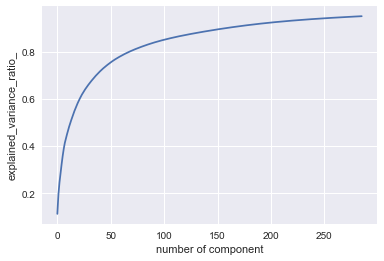

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("number of component")
plt.ylabel("explained_variance_ratio_")

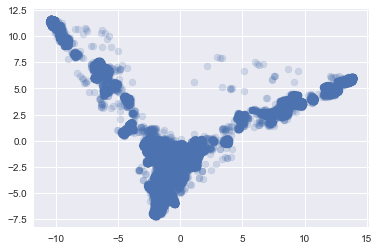

In [16]:
plt.scatter(a_pca[:,0],a_pca[:,1],alpha=0.2)

# doing k-means cluster

In [17]:
from sklearn.cluster import KMeans

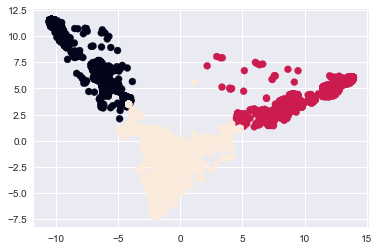

In [18]:
x_pred = KMeans(n_clusters=3, random_state=9).fit_predict(a_pca)
plt.scatter(a_pca[:, 0], a_pca[:, 1], c=x_pred)
plt.show()

In [19]:
from sklearn import metrics
metrics.calinski_harabaz_score(a_pca, x_pred) 

25346.752397858425

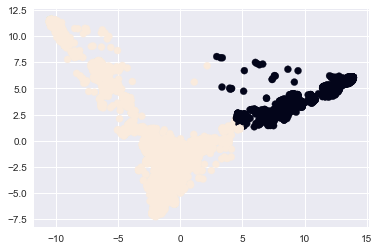

25187.384569008853

In [20]:
x2_pred = KMeans(n_clusters=2, random_state=9).fit_predict(a_pca)
plt.scatter(a_pca[:, 0], a_pca[:, 1], c=x2_pred)
plt.show()
metrics.calinski_harabaz_score(a_pca, x2_pred)

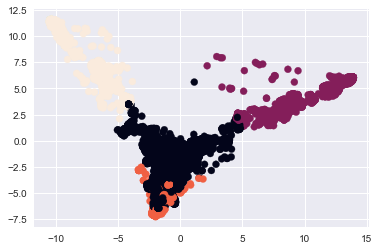

22651.63623236204

In [21]:
x4_pred = KMeans(n_clusters=4, random_state=9).fit_predict(a_pca)
plt.scatter(a_pca[:, 0], a_pca[:, 1], c=x4_pred)
plt.show()
metrics.calinski_harabaz_score(a_pca, x4_pred)

In [21]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.random_projection import sparse_random_matrix
# svd = TruncatedSVD(n_components=100, n_iter=7, random_state=42)
# svd.fit(a) 

# print(svd.explained_variance_ratio_) 

TruncatedSVD(algorithm='randomized', n_components=100, n_iter=7,
       random_state=42, tol=0.0)

In [24]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(a)
# a = scaler.transform(a)

In [27]:
# pca=PCA(n_components=0.95, svd_solver="full")
# pca.fit(a)
# print(pca.explained_variance_ratio_)  
# print(pca.singular_values_) 

[0.06402783 0.06212311 0.05043267 0.03513258 0.02945087 0.02892478
 0.02455838 0.02290653 0.02226318 0.02105192 0.0183283  0.01773417
 0.01448654 0.01391993 0.01271249 0.01232339 0.01212908 0.01181169
 0.01126678 0.01084684 0.01056278 0.01029995 0.00981221 0.00933789
 0.0085103  0.00811858 0.00789154 0.00739782 0.00674907 0.00650061
 0.00618827 0.00616199 0.00607696 0.00585879 0.00548305 0.00537881
 0.00510608 0.00493522 0.00488598 0.00456947 0.00448782 0.00443562
 0.00441331 0.00435876 0.00425241 0.00405361 0.00394425 0.00391959
 0.00386747 0.00379007 0.00376367 0.00365668 0.00359918 0.00355841
 0.00348544 0.00344434 0.00338959 0.00328567 0.00320611 0.00317727
 0.00313604 0.00302773 0.00292688 0.00289203 0.00286398 0.00277799
 0.00274662 0.0026746  0.00265605 0.00257762 0.00252768 0.00251479
 0.00249272 0.00243749 0.00234547 0.00231775 0.00227215 0.00220382
 0.00219074 0.00211463 0.00210431 0.0020892  0.0020677  0.00196958
 0.00195564 0.00191226 0.00190786 0.00190042 0.00185501 0.0018